# 1. LIBRERIAS

In [229]:
import os
import pandas as pd
import numpy as np
from numpy import sum
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import matplotlib.gridspec as gridspec
import seaborn as sns
import scipy.io
from LibData import *
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# 2. DATA

In [3]:
PATH=r'C:\Users\LIIAARC LAPTOP - 02\Desktop\CodeTemporal\NinawebData'

In [4]:
data1=scipy.io.loadmat(PATH+'\s1\s1\S1_E3_A1')
data2=scipy.io.loadmat(PATH+'\s2\s2\S2_E3_A1')
data3=scipy.io.loadmat(PATH+'\s3\s3\S3_E3_A1')
data4=scipy.io.loadmat(PATH+'\s4\s4\S4_E3_A1')
data5=scipy.io.loadmat(PATH+'\s5\s5\S5_E3_A1')
data6=scipy.io.loadmat(PATH+'\s6\s6\S6_E3_A1')
data7=scipy.io.loadmat(PATH+'\s7\s7\S7_E3_A1')
data8=scipy.io.loadmat(PATH+'\s8\s8\S8_E3_A1')
data9=scipy.io.loadmat(PATH+'\s9\s9\S9_E3_A1')
data10=scipy.io.loadmat(PATH+'\s10\s10\S10_E3_A1')

In [5]:
emg_signal1=pd.DataFrame(data1["emg"])
emg_signal2=pd.DataFrame(data2["emg"])
emg_signal3=pd.DataFrame(data3["emg"])
emg_signal4=pd.DataFrame(data4["emg"])
emg_signal5=pd.DataFrame(data5["emg"])
emg_signal6=pd.DataFrame(data6["emg"])
emg_signal7=pd.DataFrame(data7["emg"])
emg_signal8=pd.DataFrame(data8["emg"])
emg_signal9=pd.DataFrame(data9["emg"])
emg_signal10=pd.DataFrame(data10["emg"])
estimulos1=pd.DataFrame(data1["stimulus"])
estimulos2=pd.DataFrame(data2["stimulus"])
estimulos3=pd.DataFrame(data3["stimulus"])
estimulos4=pd.DataFrame(data4["stimulus"])
estimulos5=pd.DataFrame(data5["stimulus"])
estimulos6=pd.DataFrame(data6["stimulus"])
estimulos7=pd.DataFrame(data7["stimulus"])
estimulos8=pd.DataFrame(data8["stimulus"])
estimulos9=pd.DataFrame(data9["stimulus"])
estimulos10=pd.DataFrame(data10["stimulus"])
restimulos1=pd.DataFrame(data1["restimulus"])
restimulos2=pd.DataFrame(data2["restimulus"])
restimulos3=pd.DataFrame(data3["restimulus"])
restimulos4=pd.DataFrame(data4["restimulus"])
restimulos5=pd.DataFrame(data5["restimulus"])
restimulos6=pd.DataFrame(data6["restimulus"])
restimulos7=pd.DataFrame(data7["restimulus"])
restimulos8=pd.DataFrame(data8["restimulus"])
restimulos9=pd.DataFrame(data9["restimulus"])
restimulos10=pd.DataFrame(data10["restimulus"])
repetition1=pd.DataFrame(data1["repetition"])
repetition2=pd.DataFrame(data2["repetition"])
repetition3=pd.DataFrame(data3["repetition"])
repetition4=pd.DataFrame(data4["repetition"])
repetition5=pd.DataFrame(data5["repetition"])
repetition6=pd.DataFrame(data6["repetition"])
repetition7=pd.DataFrame(data7["repetition"])
repetition8=pd.DataFrame(data8["repetition"])
repetition9=pd.DataFrame(data9["repetition"])
repetition10=pd.DataFrame(data10["repetition"])
rerepetition1=pd.DataFrame(data1["rerepetition"])
rerepetition2=pd.DataFrame(data2["rerepetition"])
rerepetition3=pd.DataFrame(data3["rerepetition"])
rerepetition4=pd.DataFrame(data4["rerepetition"])
rerepetition5=pd.DataFrame(data5["rerepetition"])
rerepetition6=pd.DataFrame(data6["rerepetition"])
rerepetition7=pd.DataFrame(data7["rerepetition"])
rerepetition8=pd.DataFrame(data8["rerepetition"])
rerepetition9=pd.DataFrame(data9["rerepetition"])
rerepetition10=pd.DataFrame(data10["rerepetition"])

In [6]:
# Poniendo en una lista los elementos de cada electrodo por cada señal capturada
emg_signal_1=[]
emg_signal_2=[]
emg_signal_3=[]
emg_signal_4=[]
emg_signal_5=[]
emg_signal_6=[]
emg_signal_7=[]
emg_signal_8=[]
emg_signal_9=[]
emg_signal_10=[]
for i in range(16):
    emg_signal_1.append(emg_signal1[i])
    emg_signal_2.append(emg_signal2[i])
    emg_signal_3.append(emg_signal3[i])
    emg_signal_4.append(emg_signal4[i])
    emg_signal_5.append(emg_signal5[i])
    emg_signal_6.append(emg_signal6[i])
    emg_signal_7.append(emg_signal7[i])
    emg_signal_8.append(emg_signal8[i])
    emg_signal_9.append(emg_signal9[i])
    emg_signal_10.append(emg_signal10[i])

## 2.2. GENERACIÓN DE LA DATA PARTICIONADA

In [7]:
emg_by_est1 = signaltotal_by_est(emg_signal_1,estimulos1)
emg_by_est2 = signaltotal_by_est(emg_signal_2,estimulos2)
emg_by_est3 = signaltotal_by_est(emg_signal_3,estimulos3)
emg_by_est4 = signaltotal_by_est(emg_signal_4,estimulos4)
emg_by_est5 = signaltotal_by_est(emg_signal_5,estimulos5)
emg_by_est6 = signaltotal_by_est(emg_signal_6,estimulos6)
emg_by_est7 = signaltotal_by_est(emg_signal_7,estimulos7)
emg_by_est8 = signaltotal_by_est(emg_signal_8,estimulos8)
emg_by_est9 = signaltotal_by_est(emg_signal_9,estimulos9)
emg_by_est10 = signaltotal_by_est(emg_signal_10,estimulos10)

In [8]:
emg_by_est_total = []
emg_by_est_total.append(emg_by_est1) # Dimension 10x16x23
emg_by_est_total.append(emg_by_est2)
emg_by_est_total.append(emg_by_est3)
emg_by_est_total.append(emg_by_est4)
emg_by_est_total.append(emg_by_est5)
emg_by_est_total.append(emg_by_est6)
emg_by_est_total.append(emg_by_est7)
emg_by_est_total.append(emg_by_est8)
emg_by_est_total.append(emg_by_est9)
emg_by_est_total.append(emg_by_est10)

In [9]:
print("El número de sujetos:",len(emg_by_est_total),"\nEl número de electrodos de la señal es:",len(emg_by_est_total[0]),"\nEl número de estímulos es:",len(emg_by_est_total[0][0]),"\n")

El número de sujetos: 10 
El número de electrodos de la señal es: 16 
El número de estímulos es: 23 



In [10]:
rep_est_1=rep_by_est(estimulos1,repetition1) # Dimension 1x23
rep_est_2=rep_by_est(estimulos2,repetition2)
rep_est_3=rep_by_est(estimulos3,repetition3)
rep_est_4=rep_by_est(estimulos4,repetition4)
rep_est_5=rep_by_est(estimulos5,repetition5)
rep_est_6=rep_by_est(estimulos6,repetition6)
rep_est_7=rep_by_est(estimulos7,repetition7)
rep_est_8=rep_by_est(estimulos8,repetition8)
rep_est_9=rep_by_est(estimulos9,repetition9)
rep_est_10=rep_by_est(estimulos10,repetition10)
rep_est_total = []
rep_est_total.append(rep_est_1)
rep_est_total.append(rep_est_2)
rep_est_total.append(rep_est_3)
rep_est_total.append(rep_est_4)
rep_est_total.append(rep_est_5)
rep_est_total.append(rep_est_6)
rep_est_total.append(rep_est_7)
rep_est_total.append(rep_est_8)
rep_est_total.append(rep_est_9)
rep_est_total.append(rep_est_10)

In [13]:
emg_est_elect_1=[]
emg_est_elect_2=[]
emg_est_elect_3=[]
emg_est_elect_4=[]
emg_est_elect_5=[]
emg_est_elect_6=[]
emg_est_elect_7=[]
emg_est_elect_8=[]
emg_est_elect_9=[]
emg_est_elect_10=[]
emg_est_elect_11=[]
emg_est_elect_12=[]
emg_est_elect_13=[]
emg_est_elect_14=[]
emg_est_elect_15=[]
emg_est_elect_16=[]

In [14]:
elect_total=[]
elect_total.append(emg_est_elect_1)
elect_total.append(emg_est_elect_2)
elect_total.append(emg_est_elect_3)
elect_total.append(emg_est_elect_4)
elect_total.append(emg_est_elect_5)
elect_total.append(emg_est_elect_6)
elect_total.append(emg_est_elect_7)
elect_total.append(emg_est_elect_8)
elect_total.append(emg_est_elect_9)
elect_total.append(emg_est_elect_10)
elect_total.append(emg_est_elect_11)
elect_total.append(emg_est_elect_12)
elect_total.append(emg_est_elect_13)
elect_total.append(emg_est_elect_14)
elect_total.append(emg_est_elect_15)
elect_total.append(emg_est_elect_16)

In [15]:
for e in range(len(elect_total)):
    for i in range(len(emg_by_est_total[0][0])): # Pasar por cada estimulo
        for j in range(len(emg_by_est_total)): # Pasar por cada sujeto
            emg_est = emg_by_est_total[j][e][i]
            rep_est = rep_est_total[j][i]
            emg_sep = signal_separate(emg_est,rep_est,num_rep)
            for r in range(num_rep):
                elect_total[e].append(emg_sep[r])

In [16]:
len(elect_total)

16

In [17]:
len(elect_total[15])

1380

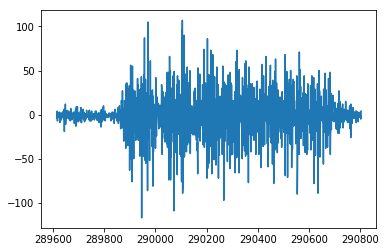

In [18]:
plt.plot(elect_total[15][1378])

La figura muestra la señal muestreada a 200 Hz

In [205]:
electrodo_01=elect_total[0]
electrodo_02=elect_total[1]
electrodo_03=elect_total[2]
electrodo_04=elect_total[3]
electrodo_05=elect_total[4]
electrodo_06=elect_total[5]
electrodo_07=elect_total[6]
electrodo_08=elect_total[7]
electrodo_09=elect_total[8]
electrodo_10=elect_total[9]
electrodo_11=elect_total[10]
electrodo_12=elect_total[11]
electrodo_13=elect_total[12]
electrodo_14=elect_total[13]
electrodo_15=elect_total[14]
electrodo_16=elect_total[15]

In [223]:
estimulos = []
for i in range(23):
    estimulos=np.append(estimulos,np.ones(60)*(i+1),axis=0)
len(estimulos)

1380

In [224]:
estimulos_pd=pd.DataFrame(estimulos)

In [226]:
estimulos_pd.head()

0
0  1.0
1  1.0
2  1.0
3  1.0
4  1.0

# 3. FEATURE EXTRACTION

## 3.1. DEFINIENDO LAS FUNCIONES PARA LA EXTRACCIÓN DE CARACTERÍSTICAS

In [78]:
def iemg(emg):
    I=sum(np.abs(emg))
    return I

In [79]:
def ZC(emg,umbral):
    N=len(emg)
    product=np.multiply(emg[0:N-1],emg[1:N])
    dif=np.abs(emg[0:N-1]-emg[1:N])
    s=0
    for i in range(N-1):
        sgn=0
        dif_cond=0
        if(product[i]>=umbral):
            sgn=1
        if(dif[i]>=umbral):
            dif_cond=1
        s = s + (sgn*dif_cond)
    return s

In [80]:
def WL(emg):
    N=len(emg)
    dif=emg[1:N]-emg[0:N-1]
    wl=sum(np.abs(dif))
    return wl

In [81]:
def WAMP(emg,umbral):
    N=len(emg)
    dif=emg[1:N]-emg[0:N-1]
    dif_abs=np.abs(dif)
    s=0
    for i in range(N-1):
        if (dif_abs[i]>= umbral):
            s=s+1
    return s

In [82]:
def mav(emg):
    N=len(emg)
    mav=(1/N)*sum(np.abs(emg))
    return mav

In [83]:
def VAR(emg):
    N=len(emg)
    var=(1/(N-1))*sum(np.abs(emg)*np.abs(emg))
    return var

In [84]:
def RMS(emg):
    N=len(emg)
    rms=np.sqrt((1/N)*sum(np.abs(emg)*np.abs(emg)))
    return rms

In [198]:
def LOG(emg):
    N=len(emg)
    suma=sum(np.log(np.abs(emg)+0.01))
    LOG=np.exp(suma/N)
    return LOG

In [86]:
def SSC(emg,umbral):
    N=len(emg)
    dif1=emg[1:N-1]-emg[0:N-2]
    dif2=emg[1:N-1]-emg[2:N]
    product=np.multiply(dif1,dif2)
    s=0
    for i in range(N-2):
        if (product[i]>= umbral):
            s=s+1
    return s

In [99]:
def generate_features1(signal,params):
    
    umbral_zc = params[0]
    umbral_wamp = params[1]
    umbral_ssc = params[2]
    
    if isinstance(signal,pd.core.frame.DataFrame):
        features = pd.DataFrame()
        #Pasar por los 1380 datos
        for i in range(len(signal)):
            #Acceder a la serie temporal
            serie = signal.iloc[i]
            k = len(serie)
            ftrs = pd.DataFrame([iemg(serie), ZC(serie,umbral_zc), WL(serie), WAMP(serie,umbral_wamp),
                                mav(serie), VAR(serie), RMS(serie), LOG(serie), SSC(serie,umbral_ssc)]).T
            features = pd.concat([features, ftrs], axis=0, ignore_index = True)
    else:
        features = []
        for i in range(len(signal)):
            serie = signal[i]
            k = len(serie)
            serie = np.array(serie)
            ftrs = [iemg(serie), ZC(serie,umbral_zc), WL(serie), WAMP(serie,umbral_wamp),
                                mav(serie), VAR(serie), RMS(serie), LOG(serie), SSC(serie,umbral_ssc)]
            features.append(ftrs)
    return features

## 3.2. GENNERANDO Y GUARDANDO LOS FEATURES

In [88]:
params = [0,0,0]

In [201]:
features_e1 = generate_features1(electrodo_01,params)

In [202]:
features_e1 = pd.DataFrame(features_e1)

In [203]:
features_e1.head()

0    1        2     3          4           5          6         7  \
0  19228.0  510  30962.0  1109  17.322523  670.012624  25.872940  7.788561   
1  15040.0  543  23335.0  1109  13.549550  408.706943  20.207393  6.240480   
2  12185.0  600  18128.0  1100  11.067212  294.037273  17.139726  4.529055   
3  16433.0  584  25617.0  1097  14.966302  616.230629  24.812686  5.052762   
4  12617.0  576  19178.0  1100  11.459582  343.426364  18.523349  4.330850   

     8  
0  801  
1  769  
2  784  
3  773  
4  794

In [206]:
features_e1 = generate_features1(electrodo_01,params)
features_e2 = generate_features1(electrodo_02,params)
features_e3 = generate_features1(electrodo_03,params)
features_e4 = generate_features1(electrodo_04,params)
features_e5 = generate_features1(electrodo_05,params)
features_e6 = generate_features1(electrodo_06,params)
features_e7 = generate_features1(electrodo_07,params)
features_e8 = generate_features1(electrodo_08,params)
features_e9 = generate_features1(electrodo_09,params)
features_e10 = generate_features1(electrodo_10,params)
features_e11 = generate_features1(electrodo_11,params)
features_e12 = generate_features1(electrodo_12,params)
features_e13 = generate_features1(electrodo_13,params)
features_e14 = generate_features1(electrodo_14,params)
features_e15 = generate_features1(electrodo_15,params)
features_e16 = generate_features1(electrodo_16,params)

In [208]:
features_e1 = pd.DataFrame(features_e1)
features_e2 = pd.DataFrame(features_e2)
features_e3 = pd.DataFrame(features_e3)
features_e4 = pd.DataFrame(features_e4)
features_e5 = pd.DataFrame(features_e5)
features_e6 = pd.DataFrame(features_e6)
features_e7 = pd.DataFrame(features_e7)
features_e8 = pd.DataFrame(features_e8)
features_e9 = pd.DataFrame(features_e9)
features_e10 = pd.DataFrame(features_e10)
features_e11 = pd.DataFrame(features_e11)
features_e12 = pd.DataFrame(features_e12)
features_e13 = pd.DataFrame(features_e13)
features_e14 = pd.DataFrame(features_e14)
features_e15 = pd.DataFrame(features_e15)
features_e16 = pd.DataFrame(features_e16)

In [209]:
try:
    os.makedirs('Features')
except:
    pass

features_e1.to_csv('Features/E01.txt', index=False, header=None)
features_e2.to_csv('Features/E02.txt', index=False, header=None)
features_e3.to_csv('Features/E03.txt', index=False, header=None)
features_e4.to_csv('Features/E04.txt', index=False, header=None)
features_e5.to_csv('Features/E05.txt', index=False, header=None)
features_e6.to_csv('Features/E06.txt', index=False, header=None)
features_e7.to_csv('Features/E07.txt', index=False, header=None)
features_e8.to_csv('Features/E08.txt', index=False, header=None)
features_e9.to_csv('Features/E09.txt', index=False, header=None)
features_e10.to_csv('Features/E10.txt', index=False, header=None)
features_e11.to_csv('Features/E11.txt', index=False, header=None)
features_e12.to_csv('Features/E12.txt', index=False, header=None)
features_e13.to_csv('Features/E13.txt', index=False, header=None)
features_e14.to_csv('Features/E14.txt', index=False, header=None)
features_e15.to_csv('Features/E15.txt', index=False, header=None)
features_e16.to_csv('Features/E16.txt', index=False, header=None)

## 3.3. LOADING THE GENERATED FEATURES

In [210]:
features_dict={0:'IEMG()',1:'ZC()',2:'WL()',3:'WAMP()',4:'MAV()',5:'VAR()',6:'RMS()',7:'LOG()',
               8:'SSC()'}

In [211]:
def generate_header(name):
    header = []
    for i in range(9):
        header.append(name+'.'+features_dict[i])
    return header

In [212]:
features_e1_all = pd.read_csv('Features/E01.txt',header=None)
features_e1_all.columns=generate_header('E01')
features_e2_all = pd.read_csv('Features/E02.txt',header=None)
features_e2_all.columns=generate_header('E02')
features_e3_all = pd.read_csv('Features/E03.txt',header=None)
features_e3_all.columns=generate_header('E03')
features_e4_all = pd.read_csv('Features/E04.txt',header=None)
features_e4_all.columns=generate_header('E04')
features_e5_all = pd.read_csv('Features/E05.txt',header=None)
features_e5_all.columns=generate_header('E05')
features_e6_all = pd.read_csv('Features/E06.txt',header=None)
features_e6_all.columns=generate_header('E06')
features_e7_all = pd.read_csv('Features/E07.txt',header=None)
features_e7_all.columns=generate_header('E07')
features_e8_all = pd.read_csv('Features/E08.txt',header=None)
features_e8_all.columns=generate_header('E08')
features_e9_all = pd.read_csv('Features/E09.txt',header=None)
features_e9_all.columns=generate_header('E09')
features_e10_all = pd.read_csv('Features/E10.txt',header=None)
features_e10_all.columns=generate_header('E10')
features_e11_all = pd.read_csv('Features/E11.txt',header=None)
features_e11_all.columns=generate_header('E11')
features_e12_all = pd.read_csv('Features/E12.txt',header=None)
features_e12_all.columns=generate_header('E12')
features_e13_all = pd.read_csv('Features/E13.txt',header=None)
features_e13_all.columns=generate_header('E13')
features_e14_all = pd.read_csv('Features/E14.txt',header=None)
features_e14_all.columns=generate_header('E14')
features_e15_all = pd.read_csv('Features/E15.txt',header=None)
features_e15_all.columns=generate_header('E15')
features_e16_all = pd.read_csv('Features/E16.txt',header=None)
features_e16_all.columns=generate_header('E16')

## 3.4. EXPLORATORY ANALISYS

In [213]:
features_e1_all.describe()

E01.IEMG()     E01.ZC()      E01.WL()   E01.WAMP()    E01.MAV()  \
count   1380.000000  1380.000000   1380.000000  1380.000000  1380.000000   
mean   10827.851449   642.283333  16916.057246  1205.697101     9.057517   
std     5567.988582    79.400921   8816.542823    52.449785     4.807137   
min     2397.000000   473.000000   3383.000000  1089.000000     2.040000   
25%     6609.500000   580.000000  10238.500000  1184.000000     5.328989   
50%     9662.000000   639.000000  14918.500000  1222.500000     7.968897   
75%    13840.000000   697.250000  21861.500000  1245.000000    11.618798   
max    37096.000000   932.000000  57675.000000  1301.000000    30.208469   

         E01.VAR()    E01.RMS()    E01.LOG()    E01.SSC()  
count  1380.000000  1380.000000  1380.000000  1380.000000  
mean    249.089048    13.966334     3.743046   891.674638  
std     263.810580     7.338888     2.106501    53.869467  
min       6.907069     2.627087     0.810176   751.000000  
25%      67.790982     8.230247     2.117112   856.000000  
50%     150.147548    12.248465     3.309646   900.000000  
75%     344.525263    18.553842     4.911086   931.250000  
max    1798.484108    42.391267    15.310991  1015.000000

In [214]:
features_e2_all.describe()

E02.IEMG()     E02.ZC()      E02.WL()   E02.WAMP()    E02.MAV()  \
count   1380.000000  1380.000000   1380.000000  1380.000000  1380.000000   
mean   10799.796377   651.241304  17217.513768  1205.697101     9.027173   
std     5302.891197    90.953289   8785.466260    52.449785     4.567802   
min     2717.000000   427.000000   3753.000000  1089.000000     2.142744   
25%     6991.250000   592.000000  10856.250000  1184.000000     5.693964   
50%     9824.000000   653.000000  15561.000000  1222.500000     8.089444   
75%    13613.500000   718.000000  22221.000000  1245.000000    11.569251   
max    43183.000000   895.000000  70054.000000  1301.000000    35.222675   

         E02.VAR()    E02.RMS()    E02.LOG()    E02.SSC()  
count  1380.000000  1380.000000  1380.000000  1380.000000  
mean    254.324297    14.261497     3.490405   898.342029  
std     267.326566     7.124376     1.990146    52.741386  
min       7.881840     2.806349     0.772626   754.000000  
25%      82.170417     9.060988     2.080946   864.000000  
50%     162.745501    12.751960     3.007838   906.000000  
75%     340.463059    18.444002     4.337578   936.000000  
max    2588.102041    50.852640    16.441598  1047.000000

In [215]:
features_e3_all.describe()

E03.IEMG()     E03.ZC()      E03.WL()   E03.WAMP()    E03.MAV()  \
count   1380.000000  1380.000000   1380.000000  1380.000000  1380.000000   
mean    6533.190580   716.089855   9993.423913  1205.697101     5.454170   
std     3146.608448    86.801470   5035.971788    52.449785     2.728901   
min     1589.000000   509.000000   1990.000000  1089.000000     1.277331   
25%     4393.000000   647.000000   6593.500000  1184.000000     3.621702   
50%     5855.000000   713.000000   8886.000000  1222.500000     4.883518   
75%     7850.500000   781.000000  12002.250000  1245.000000     6.527330   
max    23196.000000   974.000000  33888.000000  1301.000000    20.935018   

         E03.VAR()    E03.RMS()    E03.LOG()    E03.SSC()  
count  1380.000000  1380.000000  1380.000000  1380.000000  
mean     96.816339     8.594882     2.041338   897.146377  
std     126.708036     4.783206     0.950397    57.405574  
min       2.654063     1.628475     0.478815   754.000000  
25%      29.692665     5.446876     1.369797   855.000000  
50%      54.864520     7.403921     1.877980   899.000000  
75%     106.155610    10.299048     2.477184   939.000000  
max    1289.434508    35.892489     6.036914  1044.000000

In [216]:
features_e4_all.describe()

E04.IEMG()     E04.ZC()      E04.WL()   E04.WAMP()    E04.MAV()  \
count   1380.000000  1380.000000   1380.000000  1380.000000  1380.000000   
mean    4337.839130   786.317391   6249.065217  1205.697101     3.597928   
std     2443.201765    83.260205   3551.982752    52.449785     2.004160   
min     1296.000000   577.000000   1569.000000  1089.000000     1.041801   
25%     2906.750000   726.000000   4172.750000  1184.000000     2.384288   
50%     3563.000000   787.000000   5199.000000  1222.500000     2.982380   
75%     4781.250000   845.000000   7021.000000  1245.000000     4.162683   
max    21316.000000  1051.000000  30028.000000  1301.000000    17.232013   

         E04.VAR()    E04.RMS()    E04.LOG()    E04.SSC()  
count  1380.000000  1380.000000  1380.000000  1380.000000  
mean     40.250869     5.408586     1.379717   912.776087  
std      63.530175     3.312503     0.822030    69.139400  
min       1.837490     1.354996     0.333665   730.000000  
25%      11.985205     3.460540     0.858391   860.000000  
50%      18.576314     4.308095     1.156223   909.000000  
75%      39.239939     6.261346     1.573392   962.000000  
max     749.312298    27.362503     6.850894  1085.000000

In [217]:
features_e5_all.describe()

E05.IEMG()     E05.ZC()      E05.WL()   E05.WAMP()    E05.MAV()  \
count   1380.000000  1380.000000   1380.000000  1380.000000  1380.000000   
mean    5203.105797   777.145652   7979.425362  1205.697101     4.339131   
std     3434.295936    91.804873   5705.340474    52.449785     2.925093   
min     1343.000000   517.000000   1530.000000  1089.000000     1.079582   
25%     3135.250000   723.000000   4548.500000  1184.000000     2.584087   
50%     4100.500000   780.000000   6100.000000  1222.500000     3.351774   
75%     5785.250000   839.000000   9024.250000  1245.000000     4.824479   
max    29474.000000  1059.000000  44741.000000  1301.000000    24.582152   

         E05.VAR()    E05.RMS()    E05.LOG()    E05.SSC()  
count  1380.000000  1380.000000  1380.000000  1380.000000  
mean     77.077318     7.134082     1.422136   930.335507  
std     134.838841     5.112359     0.867466    60.711802  
min       1.962188     1.400218     0.351305   775.000000  
25%      15.071164     3.880603     0.922488   882.000000  
50%      29.286887     5.409438     1.174045   933.000000  
75%      71.098235     8.428525     1.611944   976.000000  
max    1495.242070    38.652231     9.226147  1086.000000

In [218]:
features_e6_all.describe()

E06.IEMG()     E06.ZC()      E06.WL()   E06.WAMP()    E06.MAV()  \
count   1380.000000  1380.000000   1380.000000  1380.000000  1380.000000   
mean    6529.110870   793.556522  10090.726812  1205.697101     5.468761   
std     5012.652488   104.790902   8201.122585    52.449785     4.274635   
min     1220.000000   494.000000   1281.000000  1089.000000     0.980707   
25%     3028.000000   724.000000   4229.250000  1184.000000     2.464367   
50%     4617.000000   791.500000   6975.500000  1222.500000     3.782390   
75%     8922.000000   865.250000  14095.500000  1245.000000     7.432220   
max    40626.000000  1154.000000  64682.000000  1301.000000    33.083062   

         E06.VAR()    E06.RMS()    E06.LOG()    E06.SSC()  
count  1380.000000  1380.000000  1380.000000  1380.000000  
mean    144.829878     9.404714     1.597958   939.835507  
std     234.685176     7.503301     1.182991    62.367758  
min       1.649236     1.283709     0.299175   768.000000  
25%      14.337054     3.784894     0.847758   890.000000  
50%      44.052883     6.634474     1.204652   946.500000  
75%     179.959919    13.408996     1.994505   985.000000  
max    2303.181744    47.971931    10.692474  1128.000000

In [219]:
features_e10_all.describe()

E10.IEMG()     E10.ZC()      E10.WL()   E10.WAMP()    E10.MAV()  \
count   1380.000000  1380.000000   1380.000000  1380.000000  1380.000000   
mean   10445.927536   660.468116  16755.648551  1205.697101     8.744906   
std     5344.770918    90.948134   8875.016070    52.449785     4.644798   
min     2372.000000   431.000000   3278.000000  1089.000000     1.906752   
25%     6465.000000   591.000000  10290.250000  1184.000000     5.330171   
50%     9471.500000   658.500000  15117.000000  1222.500000     7.717959   
75%    13255.500000   724.000000  21507.750000  1245.000000    11.208360   
max    38251.000000   898.000000  63931.000000  1301.000000    31.199837   

         E10.VAR()    E10.RMS()    E10.LOG()    E10.SSC()  
count  1380.000000  1380.000000  1380.000000  1380.000000  
mean    253.541776    14.038233     3.229784   910.011594  
std     278.289225     7.503060     1.763630    52.617063  
min       5.839099     2.415451     0.766364   774.000000  
25%      69.197383     8.315120     1.937114   872.750000  
50%     155.700911    12.472921     2.818878   917.000000  
75%     343.492799    18.525582     4.086987   946.000000  
max    2096.576327    45.769709    12.920079  1053.000000

In [220]:
features_e16_all.describe()

E16.IEMG()     E16.ZC()      E16.WL()   E16.WAMP()    E16.MAV()  \
count   1380.000000  1380.000000   1380.000000  1380.000000  1380.000000   
mean    8394.173188   680.439130  13185.664493  1205.697101     6.991858   
std     4615.212139    89.369437   7382.774664    52.449785     3.900625   
min     1614.000000   454.000000   1876.000000  1089.000000     1.297428   
25%     5019.750000   614.000000   7625.000000  1184.000000     4.130723   
50%     7337.500000   676.500000  11580.000000  1222.500000     6.130662   
75%    10600.500000   744.000000  16889.750000  1245.000000     8.738307   
max    33378.000000  1034.000000  52533.000000  1301.000000    30.043204   

         E16.VAR()    E16.RMS()    E16.LOG()    E16.SSC()  
count  1380.000000  1380.000000  1380.000000  1380.000000  
mean    162.533567    11.075909     2.686644   917.740580  
std     200.051350     6.304794     1.575007    55.236174  
min       2.695093     1.641014     0.486207   743.000000  
25%      40.907280     6.393133     1.583589   878.000000  
50%      95.969657     9.792235     2.279553   925.000000  
75%     198.730198    14.091065     3.317528   958.000000  
max    1748.499099    41.796235    14.594923  1056.000000

Se observa que los valores no estan escalados, esto puede influir en la precisión del clasificador.

In [221]:
all_features_elect = pd.concat([features_e1_all,features_e2_all,features_e3_all,features_e4_all,features_e5_all,
                               features_e6_all,features_e7_all,features_e8_all,features_e9_all,features_e10_all,
                                features_e11_all,features_e12_all,features_e13_all,features_e14_all,features_e15_all,
                               features_e16_all],axis=1)

In [222]:
all_features_elect.head()

E01.IEMG()  E01.ZC()  E01.WL()  E01.WAMP()  E01.MAV()   E01.VAR()  \
0     19228.0       510   30962.0        1109  17.322523  670.012624   
1     15040.0       543   23335.0        1109  13.549550  408.706943   
2     12185.0       600   18128.0        1100  11.067212  294.037273   
3     16433.0       584   25617.0        1097  14.966302  616.230629   
4     12617.0       576   19178.0        1100  11.459582  343.426364   

   E01.RMS()  E01.LOG()  E01.SSC()  E02.IEMG()  ...  E15.SSC()  E16.IEMG()  \
0  25.872940   7.788561        801     17069.0  ...        823     10981.0   
1  20.207393   6.240480        769     14333.0  ...        868      9298.0   
2  17.139726   4.529055        784     13042.0  ...        839      9705.0   
3  24.812686   5.052762        773     18476.0  ...        838     10858.0   
4  18.523349   4.330850        794     13357.0  ...        837      8869.0   

   E16.ZC()  E16.WL()  E16.WAMP()  E16.MAV()   E16.VAR()  E16.RMS()  \
0       529   18081.0        1109   9.892793  220.453562  14.840989   
1       557   14740.0        1109   8.376577  156.589720  12.507943   
2       683   13840.0        1100   8.814714  221.660909  14.881518   
3       655   16601.0        1097   9.888889  242.853236  15.576651   
4       641   13476.0        1100   8.055404  153.310000  12.376217   

   E16.LOG()  E16.SSC()  
0   4.152760        847  
1   3.713699        793  
2   2.730304        825  
3   3.176454        810  
4   2.783908        812  

[5 rows x 144 columns]

## 3.5. FEATURE SELECTION

In [230]:
X0 = all_features_elect
y0 = estimulos_pd
X_train, X_test, y_train, y_test = train_test_split(X0,y0,test_size=0.25,shuffle=True)

In [235]:
clf = RandomForestClassifier(min_samples_leaf=6,n_estimators=200,n_jobs=-1,random_state=7)
cross_val_score(clf,X0,y0,cv=5,scoring='f1_weighted').mean()

0.28868815709579165

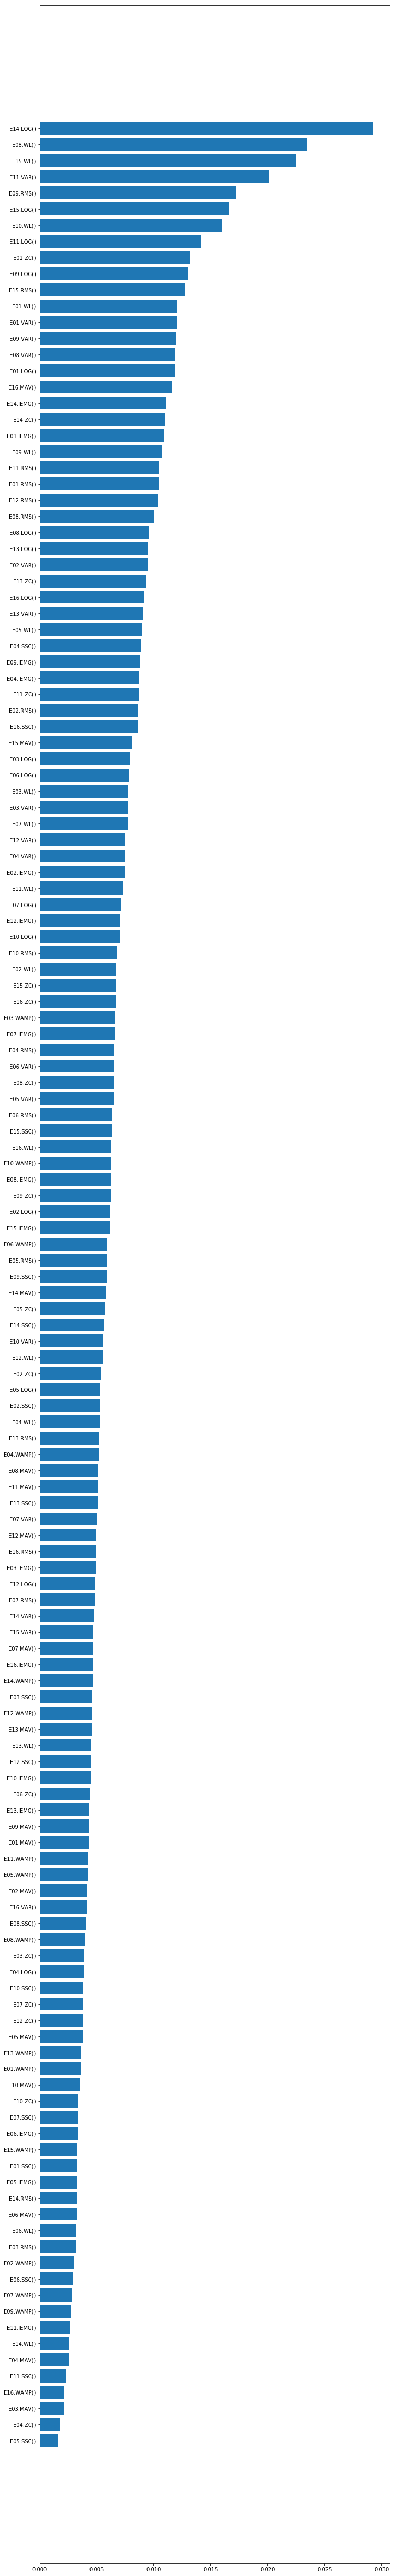

In [238]:
clf = GradientBoostingClassifier()
clf.fit(all_features_elect, estimulos_pd)
fig,ax=plt.subplots(figsize=(12,90))
cols = [col for col in all_features_elect.columns]
feature_importances = pd.DataFrame([clf.feature_importances_])
feature_importances.columns=all_features_elect.columns
feature_importances=feature_importances.sort_values(by=0,axis=1)
ax.set_yticks(np.arange(len(cols)))
ax.set_yticklabels(feature_importances.columns, rotation='horizontal')
plt.barh(range(len(feature_importances.columns)),np.array(feature_importances.iloc[0,:]))
plt.show()

In [239]:
X1 = all_features_elect
y1 = estimulos_pd
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.25,shuffle=True)

In [240]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train,y_train)
pred_rf = clf_rf.predict(X_test)
print(classification_report(y_test,pred_rf,digits=4))

              precision    recall  f1-score   support

         1.0     0.6875    0.7333    0.7097        15
         2.0     0.5882    0.7692    0.6667        13
         3.0     0.4500    0.4500    0.4500        20
         4.0     0.8182    0.7500    0.7826        24
         5.0     0.5294    0.6000    0.5625        15
         6.0     0.6000    0.8182    0.6923        11
         7.0     0.6250    0.7692    0.6897        13
         8.0     0.4000    0.5455    0.4615        11
         9.0     0.4615    0.6000    0.5217        10
        10.0     0.6154    0.7273    0.6667        22
        11.0     0.5294    0.5294    0.5294        17
        12.0     0.4000    0.4286    0.4138        14
        13.0     0.3846    0.3125    0.3448        16
        14.0     0.6154    0.8000    0.6957        10
        15.0     0.8000    0.9231    0.8571        13
        16.0     0.7143    0.3333    0.4545        15
        17.0     0.7500    0.5455    0.6316        11
        18.0     0.5714    

Los ejercicios que mejor son clasificados con los features son:
 - Extensión del dedo indice. (4)
 - Pizca de la punta. (15)
 - Flexión de la mano. (19)
 - Posición de cortar. (23)